<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/Linear_Regression_by_Kalman_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
from patsy import dmatrices
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
data = pd.read_excel('/content/MEF-DATA.xlsx')
data.drop(data.loc[data['Date'].duplicated()].index, inplace = True)
#df['datetime'] = pd.to_datetime(df['Date'])

# df = df.sort_values(df['datetime'], ascending=[True])

data.set_index(data['Date'], inplace = True)
data.drop(columns = ['Date'], inplace = True)
data.tail()


,Generation without Renewbles,Emission,Electricity price
Date,,,
2019-12-31 18:59:59.982,39770.082481,9108.529801,41.866862
2019-12-31 19:59:59.982,37786.380986,8674.740229,40.663287
2019-12-31 20:59:59.982,37386.850362,7923.937366,40.663287
2019-12-31 21:59:59.982,34511.549048,7470.995505,40.663287
2019-12-31 22:59:59.982,31848.634781,7470.995505,38.162235


heck the assumptions of a linear regression model using the statsmodels library:

Linearity: This is visually checked by plotting the residuals against the fitted values. The residuals should be randomly scattered around zero, with no systematic patterns.

Homoscedasticity: This is checked by the Breusch-Pagan test, which tests for equal variance of the residuals. A low p-value indicates that the residuals are not homoscedastic.

Normality: This is checked by a normal probability plot of the residuals and the Jarque-Bera test, which tests for normality of the residuals. A low p-value indicates that the residuals are not normally distributed.
It's important to note that these tests only provide a rough check of the assumptions and that more comprehensive approaches, such as residual plots, may be needed in practice. Additionally, even if the assumptions are met, the results may still be biased or misleading if there are omitted variables or outliers in the data.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


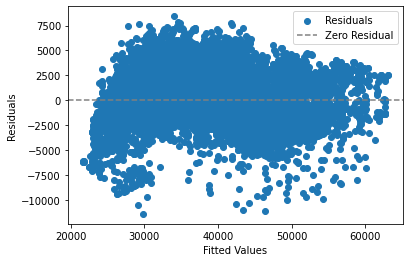

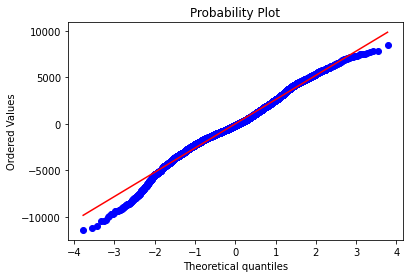

Breusch-Pagan test p-value: 0.2194572626736265
Jarque-Bera test p-value: 1.0421615861833552e-48


In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(123)
x = data['Emission']
y = data['Generation without Renewbles']

# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

# Plot residuals against fitted values
fitted_values = results.fittedvalues
residuals = results.resid
plt.scatter(fitted_values, residuals, label="Residuals")
plt.axhline(y=0, color="gray", linestyle="--", label="Zero Residual")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# Plot a normal probability plot of the residuals
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

# Check for homoscedasticity using the Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, results.model.exog)
print("Breusch-Pagan test p-value:", bp_test[1])

# Check for normality of residuals using the Jarque-Bera test
from statsmodels.stats.stattools import jarque_bera
jb_test = jarque_bera(residuals)
print("Jarque-Bera test p-value:", jb_test[1])


homoscedastic, residuals non normal


preminally statistics analysis

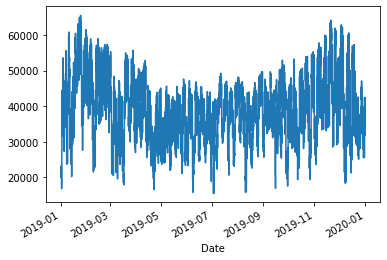

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
y.plot()
pyplot.show()

In [ ]:
data['Generation without Renewbles'].describe()

count     8760.000000
mean     38185.349641
std       9309.783031
min      15544.206823
25%      31456.026128
50%      37732.243651
75%      44343.443228
max      65540.705181
Name: Generation without Renewbles, dtype: float64

In [ ]:
data['Generation without Renewbles'].kurtosis()

-0.3447247681271466

In [ ]:
data['Generation without Renewbles'].skew()

0.23743209284872654

In [ ]:
#Unit root test DF
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
adfuller(data['Generation without Renewbles'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(-9.069393036851258,
 4.343467931649881e-15,
 35,
 8724,
 {'1%': -3.431099796556747,
  '5%': -2.861871360139148,
  '10%': -2.5669463780359156},
 151312.0604389797)

In [ ]:
stat, p = stats.normaltest(data['Generation without Renewbles'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')


Statistics=144.074, p=0.000
Data does not look Gaussian (reject H0)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kurtosis of normal distribution: -0.3452128921852031
Skewness of normal distribution: 0.23739143473449115


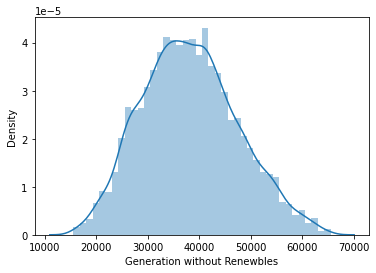

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.distplot(data['Generation without Renewbles']);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data['Generation without Renewbles'])))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data['Generation without Renewbles'])))

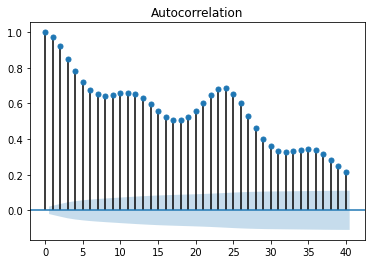

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = data['Generation without Renewbles']
plot_acf(series)
pyplot.show()

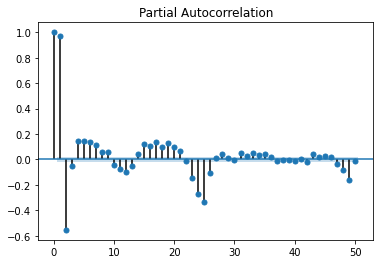

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
series = series = data['Generation without Renewbles']
plot_pacf(series, lags=50)
pyplot.show()

**Linear Regression by Kalman filter**

https://github.com/cantaro86/Financial-Models-Numerical-Methods/blob/master/5.1%20Linear%20regression%20-%20Kalman%20filter.ipynb


In [ ]:
!pip install functions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install filterpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from filterpy.kalman import KalmanFilter

ModuleNotFoundError: ignored

In [ ]:
import numpy as np
import datetime as dt
import pandas as pd
import importlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.gridspec as gridspec
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as ss
from scipy.optimize import minimize
from IPython import display
from scipy.linalg import inv
#import functions.Kalman_filter as KF

In [ ]:
df = data[ ["Generation without Renewbles","Emission"] ]
df.tail()

,Generation without Renewbles,Emission
Date,,
2019-12-31 18:59:59.982,39770.082481,9108.529801
2019-12-31 19:59:59.982,37786.380986,8674.740229
2019-12-31 20:59:59.982,37386.850362,7923.937366
2019-12-31 21:59:59.982,34511.549048,7470.995505
2019-12-31 22:59:59.982,31848.634781,7470.995505


work with log-returns

In [ ]:
#returns = "log-returns"

#if returns=="log-returns":
    #ret = np.log( df/df.shift() )[1:]
#elif returns=="linear-returns":  
   # ret = df.pct_change()[1:]
#elif returns=="total-returns":
    #ret = df/df.shift()[1:]
#ret.tail()

,Generation without Renewbles,Emission
Date,,
2019-12-31 18:59:59.982,-0.013605,-0.060729
2019-12-31 19:59:59.982,-0.051166,-0.048796
2019-12-31 20:59:59.982,-0.010630,-0.090527
2019-12-31 21:59:59.982,-0.080025,-0.058860
2019-12-31 22:59:59.982,-0.080300,0.000000


Text(0, 0.5, 'Price')

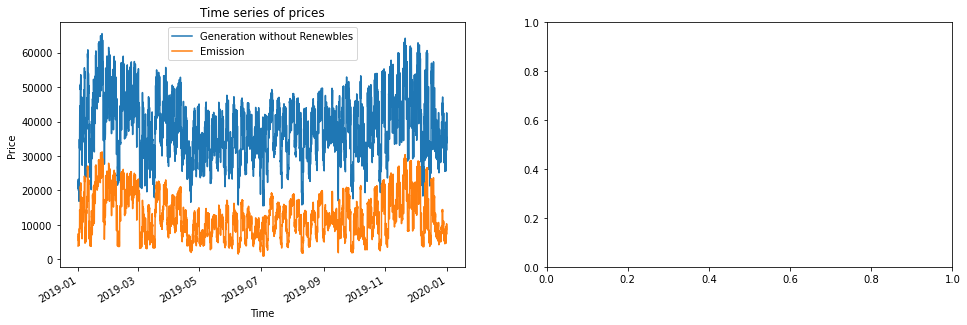

In [ ]:

NOSD = 3               # Number Of Standard Deviations
mu = df.mean()
sig = df.std()
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

df.plot(ax=ax1)
ax1.set_title("Time series of prices"); ax1.set_xlabel("Time"); ax1.set_ylabel("Price")
#ret.plot(ax=ax2)
#ax2.set_title("Time series of returns"); ax2.set_xlabel("Time"); ax2.set_ylabel(returns)
#ax2.plot(ret.index, len(ret)*[mu], color="k" )
#ax2.plot(ret.index, len(ret)*[mu+NOSD*sig], color='c' )
#ax2.plot(ret.index, len(ret)*[mu-NOSD*sig], color='c' )
#plt.show()

In [ ]:
median = df.median()
MAD = df.mad()
sig_robust = MAD*1.4826
print("STD DEV: \n", sig); print(""); print("Robust STD DEV: \n", sig_robust); 

STD DEV: 
 Generation without Renewbles    9309.783031
Emission                        6542.715545
dtype: float64

Robust STD DEV: 
 Generation without Renewbles    11186.157514
Emission                         7986.788444
dtype: float64


In [ ]:
outliers = df[df[ np.abs(df-median)>NOSD*sig_robust ].any(axis=1)]     # outliers
dret = df.drop(outliers.index)

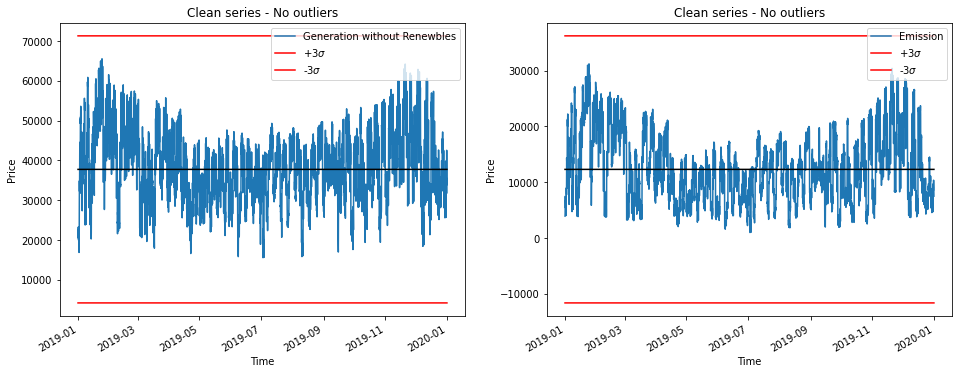

In [ ]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122) 

for ax, col in zip([ax1,ax2], dret.columns):
    dret[col].plot(ax=ax)
    ax.set_title("Clean series - No outliers"); ax.set_xlabel("Time"); ax.set_ylabel("Price")
    ax.plot(dret.index, len(dret)*[median[col]], color="k" )
    ax.plot(dret.index, len(dret)*[median[col]+NOSD*sig_robust[col]], color='r', label="+3$\sigma$" )
    ax.plot(dret.index, len(dret)*[median[col]-NOSD*sig_robust[col]], color='r', label="-3$\sigma$" )
    ax.legend(loc="upper right")
plt.show()

**Linear regression**


In [ ]:
X = dret[dret.columns[1]]
Y = dret[dret.columns[0]]
print("In our regression Y is {} and X is {}".format(dret.columns[0],dret.columns[1]) )

In our regression Y is Generation without Renewbles and X is Emission


In [ ]:
b_ss, a_ss, r_ss, _, std_err_ss = ss.linregress(X,Y)
print("We can use one of the many python functions:\nbeta: {0:6f}, alpha: {1:6f}, R2: {2:6f}, \
standard error: {3:6f}.".format(b_ss, a_ss, r_ss**2, std_err_ss))

beta_tot_OLS = np.cov(X,Y,ddof=1)[0,1] / np.var(X,ddof=1)
alpha_tot_OLS = np.mean(Y) - beta_tot_OLS * np.mean(X)
res = Y - beta_tot_OLS * X - alpha_tot_OLS
std_eps_OLS = np.std(res, ddof=2) 
print("\nOr I can estimate by myself:\nbeta: {}, alpha: {}, sigma: {}".format(beta_tot_OLS, 
                                                                             alpha_tot_OLS, std_eps_OLS))

We can use one of the many python functions:
beta: 1.365389, alpha: 20419.484281, R2: 0.920767, standard error: 0.004280.

Or I can estimate by myself:
beta: 1.3653890959619328, alpha: 20419.48428061893, sigma: 2620.6979905773874


In [ ]:
n = len(X)
x_mean = np.mean(X); y_mean = np.mean(Y)
Sxx = (X-x_mean) @ (X-x_mean)
Syy = (Y-y_mean) @ (Y-y_mean)
Sxy = (X-x_mean) @ (Y-y_mean)
beta_hat = Sxy/Sxx; alpha_hat = y_mean - beta_hat * x_mean    # beta and alpha
print("beta: {} and alpha: {}".format(beta_hat,alpha_hat))
epsilon = Y - beta_hat * X - alpha_hat             # residuals
S2 = epsilon @ epsilon / (n-2); S = np.sqrt(S2)    # unbiased estimator
print("sigma: {}".format(S))
var_beta = S2/Sxx                 # variance of beta 
var_alpha = (X@X) * S2/(Sxx * n)  # variance of alpha 
s_b = np.sqrt(var_beta)           # standard error for beta
s_a = np.sqrt(var_alpha)          # standard error for alpha
R2 = Sxy**2 / (Sxx*Syy)           
print("Standard Error for beta: ", s_b); print("R squared: {}".format(R2))
CI_b = ss.t.interval(0.95, n-2, loc=beta_hat, scale=s_b );  b_up = CI_b[0]; b_down = CI_b[1]
CI_a = ss.t.interval(0.95, n-2, loc=alpha_hat, scale=s_a )
print("Confidence intervals for beta: ", CI_b); print("Confidence intervals for alpha: ", CI_a)

beta: 1.365389095961933 and alpha: 20419.48428061893
sigma: 2620.6979905773874
Standard Error for beta:  0.0042798807990824615
R squared: 0.9207671556791244
Confidence intervals for beta:  (1.3569995242928095, 1.3737786676310566)
Confidence intervals for alpha:  (20297.30049432845, 20541.66806690941)


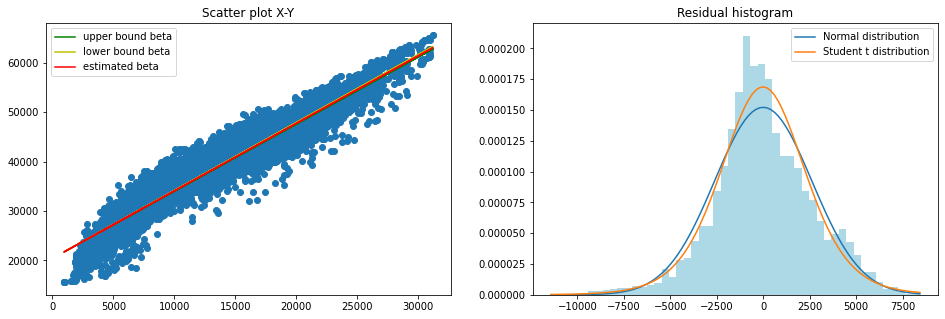

In [ ]:
x = np.linspace(res.min(),res.max(),100)     # res are the residuals

fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.scatter(X, Y); ax1.set_title("Scatter plot X-Y") 
ax1.plot(X, alpha_hat + b_up*X, color="g", label="upper bound beta")
ax1.plot(X, alpha_hat + b_down*X, color="y", label="lower bound beta")
ax1.plot(X, alpha_hat + beta_hat*X, color="red", label="estimated beta"); ax1.legend(loc="upper left")
ax2.plot(x, ss.norm.pdf(x,0,S), label="Normal distribution")
params = ss.t.fit(res)
ax2.plot(x, ss.t.pdf(x, loc=params[1], scale=params[2], df=params[0]), label="Student t distribution")
ax2.hist(res, bins=50, density=True, facecolor="LightBlue") 
ax2.legend(); ax2.set_title("Residual histogram"); plt.show()

The first thing we notice is that, although we removed the outliers, the Normal fit is still not so good.
The distribution is better described by a Student t distribution with

In [ ]:
print("Degrees of freedom of fitted t distribution: ", params[0])

Degrees of freedom of fitted t distribution:  8.275815635655444


However, it is much easier to mantain the Normal assumption, because it permits to use confidence intervals and... also... the Kalman filter!!

**The Kalman filter**

Training set

In [ ]:
Y = dret.columns[0]
X = dret.columns[1]

In [ ]:
training_size = 7000
ret_train = dret.iloc[:training_size] 
ret_test = dret.iloc[training_size:] 

In [ ]:
beta_tr, alpha_tr, _ ,_ ,_  = ss.linregress(ret_train[X], ret_train[Y])
resid_tr = ret_train[Y] - beta_tr * ret_train[X] - alpha_tr
var_eps_ols = resid_tr.var(ddof=2)                       # a possible initial guess for var_eps
print("In the training set the OLS estimators of") 
print("alpha_tr = ", alpha_tr); print("beta_tr = ", beta_tr); print("var_eps = ", var_eps_ols) 

In the training set the OLS estimators of
alpha_tr =  20183.011350420376
beta_tr =  1.382063202110952
var_eps =  6196452.031851431


In [ ]:
rolling_window = 24
rolling_beta = []
rolling_std_err = []
rolling_alpha = []

for i in range( len(ret_test) ):
    df_temp = df.iloc[ 1+i+training_size-rolling_window : 1+i+training_size ]
    beta_temp, alpha_temp , _ ,_ , std_err_temp  = ss.linregress(df_temp[X],df_temp[Y])
    rolling_beta.append(beta_temp)
    rolling_std_err.append(std_err_temp)
    rolling_alpha.append(alpha_temp)
df_test = df_test.assign(ols_beta=np.array(rolling_beta))
df_test = df_test.assign(ols_std_err=np.array(rolling_std_err))
df_test = df_test.assign(ols_alpha=np.array(rolling_alpha))

In [ ]:
x = np.array([[alpha_tr],[beta_tr]])        # initial mean of alpha and beta
P = 0.1 * np.eye(2)                         # initial covariance of alpha and beta
eta_alpha = 0.0000001                       # variance of the alpha process 
eta_beta = 0.01                             # variance of the beta process
Q = np.diag([eta_alpha, eta_beta])          # process covariance matrix 
R = np.array([[var_eps_ols]])               # variance for the measurement - 1 dim 
F = np.eye(2)                               # transition matrix
H = np.vstack( (np.ones(len(df_test)), df_test[X].values) ).T                 # measurement matrix

In [ ]:
alphas, betas = np.full( len(df_test), np.NaN ), np.full( len(df_test), np.NaN )
for i,y in enumerate(df_test[Y]):
    # predict
    x = F @ x
    P = (F @ P @ F.T) + Q
    
    #update
    S = (H[None,i] @ P @ H[None,i].T) + R     # Here S is a scalar
    K = (P @ H[None,i].T) @ inv(S)             
    r = y - H[None,i]@x                       # residuals
    x = x + K @ r                             # v is a scalar. 
    P = P - K @ H[None,i] @ P                 # K @ H[None,i] is an outer product
    
    alphas[i] = x[0]; betas[i] = x[1]

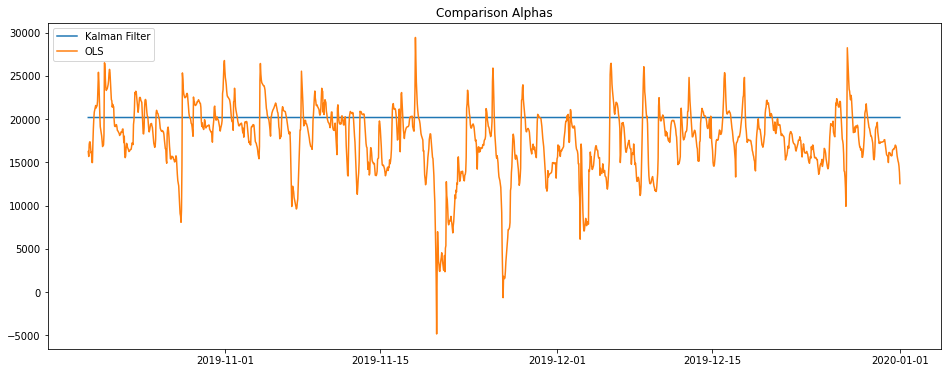

In [ ]:
plt.figure(figsize=(16,6))
plt.plot( df_test.index, alphas, label="Kalman Filter")
plt.plot( df_test["ols_alpha"], label="OLS" )
plt.legend(); plt.title("Comparison Alphas"); plt.show()

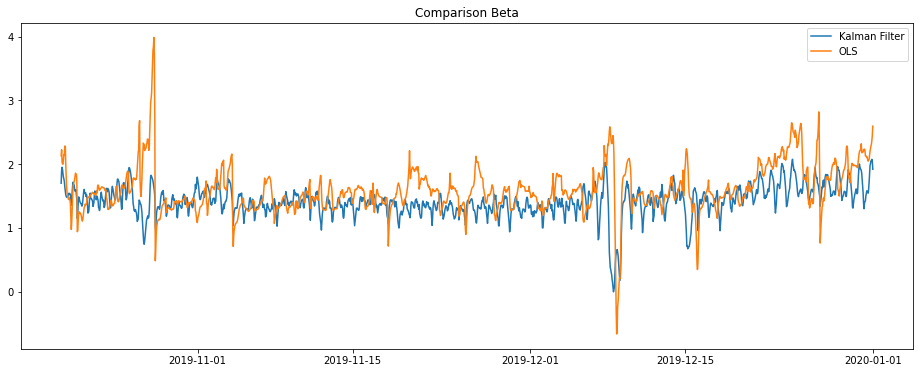

In [ ]:
plt.figure(figsize=(16,6))
plt.plot( df_test.index, betas, label="Kalman Filter")
plt.plot( df_test["ols_beta"], label="OLS" )
plt.legend(); plt.title("Comparison Beta"); plt.show()

In [ ]:
print(df_test)

                         Generation without Renewbles     Emission  ols_beta  \
Date                                                                           
2019-10-19 15:59:59.982                  37318.738644  8882.689842  2.132421   
2019-10-19 16:59:59.982                  39466.536511  8865.430444  2.226476   
2019-10-19 17:59:59.982                  37085.440469  8173.682127  2.036330   
2019-10-19 18:59:59.982                  33294.377934  7247.298372  2.001349   
2019-10-19 19:59:59.982                  31619.107151  7092.864210  2.001558   
...                                               ...          ...       ...   
2019-12-31 18:59:59.982                  39770.082481  9108.529801  2.285107   
2019-12-31 19:59:59.982                  37786.380986  8674.740229  2.316261   
2019-12-31 20:59:59.982                  37386.850362  7923.937366  2.371665   
2019-12-31 21:59:59.982                  34511.549048  7470.995505  2.454722   
2019-12-31 22:59:59.982                 

Kalman regression for the beta

The algorithms for the beta regression and the calibration based on the MLE method are implemented in the file Kalman_filter.py.

Calibration using MLE

In [ ]:
KR = KF.Kalman_regression(ret_train[X], ret_train[Y])